#### 跳表

链表加多级索引的结构，就是跳表

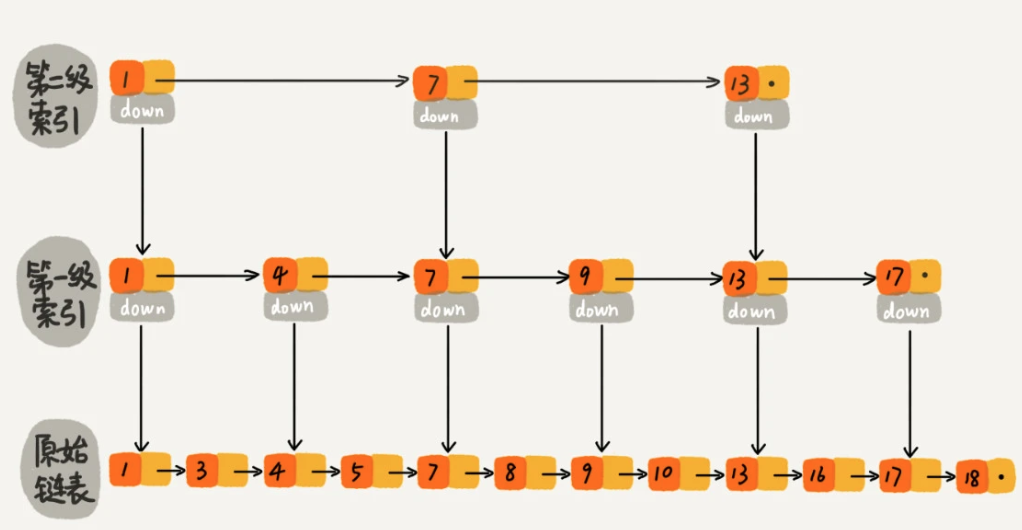

1. 什么是跳表
    1. 为一个值有序的链表建立多级索引，比如每2个节点提取一个节点到上一级，我们把抽出来的那一级叫做索引或索引层。如上图所示，其中down表示down指针，指向下一级节点。以此类推，对于节点数为n的链表，大约可以建立logn-1级索引。像这种为链表建立多级索引的数据结构就称为跳表。
    2. 层数节点：
        1. 每2个节点提取一个上级节点 n/2, n/4...n/2^h，设最后一层有2个节点，则 n/2^h=2 -> h=logn -1
        2. 每3个节点提取一个上级节点 n/3, n/9...2/3^h，设最后一层有1个节点，则 n/3^h=1 -> h=logn(3底)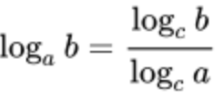
 -> logn/log3
    3. 跳表的高度：包含原始链表，跳表共有 logn 层
2. 跳表的时间复杂度
    1. 如果每一层都遍历m个节点，那在跳表中查询一个数据的时间复杂度就是O(m*logn)。假设我们要查找的数据是x，在第k级索引中，我们遍历到y节点之后，发现x大于y，小于后面的节点z，所以我们通过y的down指针，从第k级下降到第k-1级索引。在第k-1级索引中，y和z之间只有3个节点（包含y和z），所以，我们在k-1级索引中最多只需要遍历3个节点，以此类推，每一级索引都最多只需要遍历3个节点。所以m=3。因此在跳表中查询某个数据的时间复杂度就是O(logn)。
    2. 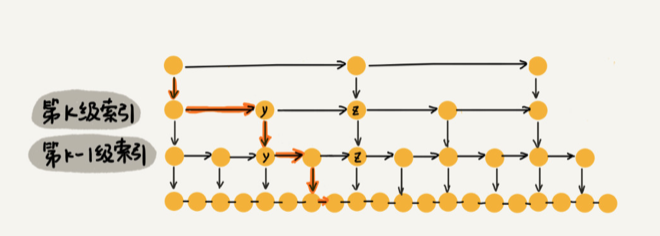
    3. 跳表本质上就是链表，所以仅插作，插入和删除操时间复杂度就为O(1)，但在实际情况中，要插入或删除某个节点，需要先查找到指定位置，而这个查找操作比较费时，但在跳表中这个查找操作的时间复杂度是O(logn)，所以，跳表的插入和删除操作的是时间复杂度也是O(logn)。
3. 空间复杂度
    1. 索引的节点总数：如果链表有n个节点，每2个节点抽取抽出一个节点作为上一级索引的节点，那每一级索引的节点数分别为：n/2+n/4+n/8…+8+4+2=n-2，所以跳表的空间复杂度为O(n)。每3个节点空间复杂度为 n/3+n/9+n/27+…+9+3+1=n/2，节省一半空间。
    2. 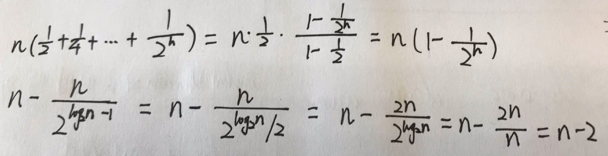
4. 高效的动态插入和删除
    1. 当往跳表中插入数据的时候，可以选择同时将这个数据插入到部分索引层中，那么如何选择这个索引层呢？可以通过随机函数来决定将这个节点插入到哪几级索引中，比如随机函数生成了值K，那就可以把这个节点添加到第1级到第K级索引中。
    2. 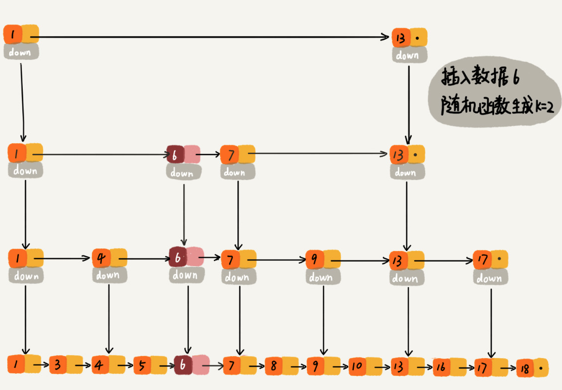


##### redis的有序集合的实现中使用了跳表
* 查看 Redis 的开发手册，就会发现，Redis 中的有序集合支持的核心操作主要有下面这几个：插入一个数据；删除一个数据；查找一个数据；按照区间查找数据（比如查找值在[100, 356]之间的数据）；迭代输出有序序列。
* 其中，插入、删除、查找以及迭代输出有序序列这几个操作，红黑树也可以完成，时间复杂度跟跳表是一样的。但是，按照区间来查找数据这个操作，红黑树的效率没有跳表高。对于按照区间查找数据这个操作，跳表可以做到 O(logn) 的时间复杂度定位区间的起点，然后在原始链表中顺序往后遍历就可以了。这样做非常高效。
* 当然，Redis 之所以用跳表来实现有序集合，还有其他原因，比如，跳表更容易代码实现。虽然跳表的实现也不简单，但比起红黑树来说还是好懂、好写多了，而简单就意味着可读性好，不容易出错。还有，跳表更加灵活，它可以通过改变索引构建策略，有效平衡执行效率和内存消耗。
* 不过，跳表也不能完全替代红黑树。因为红黑树比跳表的出现要早一些，很多编程语言中的 Map 类型都是通过红黑树来实现的。我们做业务开发的时候，直接拿来用就可以了，不用费劲自己去实现一个红黑树，但是跳表并没有一个现成的实现，所以在开发中，如果你想使用跳表，必须要自己实现。
